# Visualization Warmup

1. Copy the following code into a jupyter notebook named `visualization_warmup.ipynb`

```python
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
    df = pd.read_csv(url)
    ```

1. `df` contains (fake) data on students time at codeup:

    - `ml_coffee`: coffee consumption in milliliters
    - `syntax_errors`: number of syntax errors
    - `p_days_absent`: percentage of days absent
    
1. Create a scatter plot of `syntax_errors` and `ml_coffee`. Make sure to give your visual an appropriate title and labels.

1. Create a scatter plot of `p_days_absent` and `ml_coffee`. Make sure to give your visual an appropriate title and labels.

1. Perform any other customizations you think will help to the plots you have created

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = 'https://gist.githubusercontent.com/zgulde/018f5d601efc79cb741a7aba92f51d29/raw/c08f1c09f605b43e9a354890f9dd68f296e76dc4/students.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,ml_coffee,syntax_errors,p_days_absent
0,16225,5.071306e+10,0.038821
1,18230,5.199823e+10,0.022748
2,15877,5.072630e+10,0.036627
3,8263,4.907919e+10,0.041293
4,13935,5.145114e+10,0.081544


In [15]:
# plt.rc sets defaults for matplotlib figures
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 5))

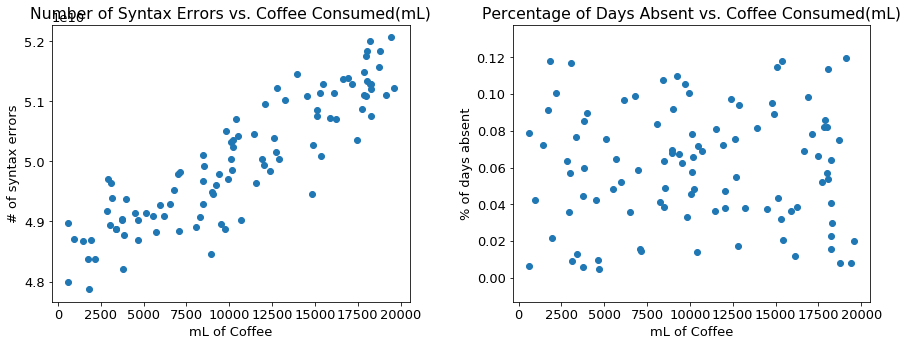

In [20]:
plt.subplot(121)
plt.scatter(x='ml_coffee', y='syntax_errors', data=df)
plt.title('Number of Syntax Errors vs. Coffee Consumed(mL)')
plt.xlabel('mL of Coffee')
plt.ylabel('# of syntax errors')

plt.subplot(122)
plt.scatter(x='ml_coffee', y='p_days_absent', data=df)
plt.title('Percentage of Days Absent vs. Coffee Consumed(mL)')
plt.xlabel('mL of Coffee')
plt.ylabel('% of days absent')

plt.tight_layout()

Zach's walkthorugh

[Text(0, 0.5, '# of syntax errors'),
 Text(0.5, 0, 'Coffee Consumption(mL)'),
 Text(0.5, 1.0, 'Students that drink more coffee tend to make more syntax errors')]

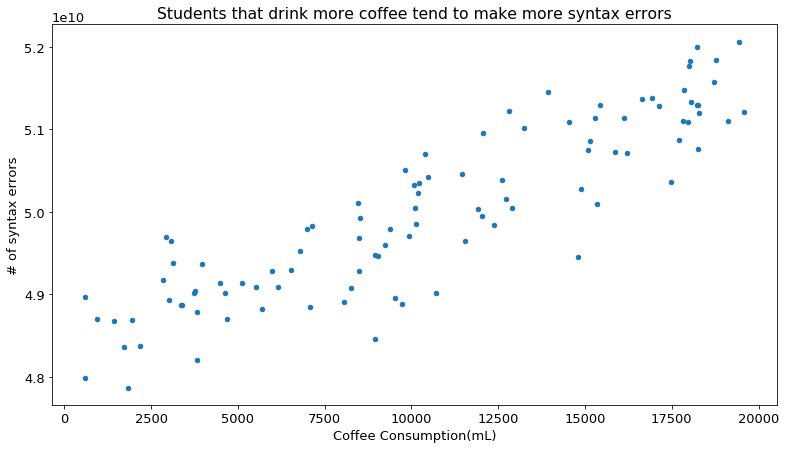

In [30]:
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 7))
ax= df.plot.scatter(y='syntax_errors', x='ml_coffee')
ax.set(
    xlabel='Coffee Consumption(mL)',
    ylabel='# of syntax errors',
    title='Students that drink more coffee tend to make more syntax errors')

In [31]:
df.head()

,ml_coffee,syntax_errors,p_days_absent,syntax_errors_billions,cups_of_coffee
0,16225,5.071306e+10,0.038821,50.713056,67.604167
1,18230,5.199823e+10,0.022748,51.998229,75.958333
2,15877,5.072630e+10,0.036627,50.726303,66.154167
3,8263,4.907919e+10,0.041293,49.079192,34.429167
4,13935,5.145114e+10,0.081544,51.451136,58.062500


In [32]:
df['syntax_errors_billions'] = df.syntax_errors/1_000_000_000
df['cups_of_coffee'] = df.ml_coffee / 30 / 8

[Text(0, 0.5, '# of syntax  (billions)'),
 Text(0.5, 0, 'Coffee Consumption(cups)'),
 Text(0.5, 1.0, 'Students that drink more coffee tend to make more syntax errors')]

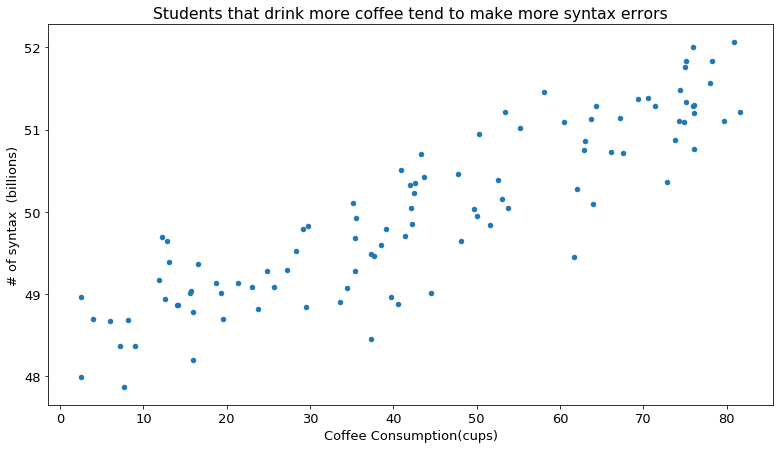

In [33]:
ax= df.plot.scatter(y='syntax_errors_billions', x='cups_of_coffee')
ax.set(
    xlabel='Coffee Consumption(cups)',
    ylabel='# of syntax  (billions)',
    title='Students that drink more coffee tend to make more syntax errors')

In [47]:
def format_y_tick(tick_value, position):
    return '{:.0%}'.format(tick_value)

def format_x_tick(tick_value, position):
    return '{:,}'.format(int(tick_value))

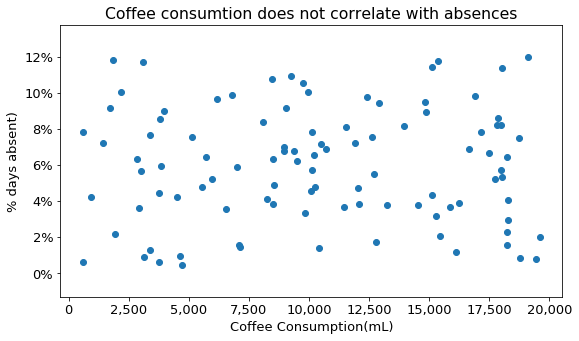

In [48]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(9,5))

ax.scatter(df.ml_coffee, df.p_days_absent)
ax.set(
    xlabel='Coffee Consumption(mL)',
    ylabel='% days absent)',
    title='Coffee consumtion does not correlate with absences')

ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_y_tick))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_x_tick))

In [49]:
ax.get_xticks()

array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
       17500., 20000., 22500.])

How to handle number presentation on x and y axis:

- domain-based scaling: e.g. divide by 1,000,000,000 and label as "billions", e.g. mL -> cups
- A custom function + mpl.ticker.FuncFormatter
- ax.get_xticks() + ax.set_xticks()